In [1]:
import warnings
warnings.simplefilter('ignore')
from neurocaps.extraction import TimeseriesExtractor
from neurocaps.analysis import CAP, merge_dicts

help(TimeseriesExtractor)
parcel_approach = {"Schaefer": {"n_rois": 100, "yeo_networks": 7, "resolution_mm": 2}}
#parcel_approach = {"AAL": {"version": "SPM12"}}

ncol = parcel_approach["Schaefer"]["n_rois"] if "Schaefer" in parcel_approach.keys() else 116
extractor = TimeseriesExtractor(parcel_approach=parcel_approach)

Help on class TimeseriesExtractor in module neurocaps.extraction.timeseriesextractor:

class TimeseriesExtractor(neurocaps._utils._timeseriesextractor_internals._timeseriesextractorgetter._TimeseriesExtractorGetter)
 |  TimeseriesExtractor(space: str = 'MNI152NLin2009cAsym', standardize: Union[bool, str] = 'zscore_sample', detrend: bool = True, low_pass: Optional[float] = None, high_pass: Optional[float] = None, parcel_approach: Dict[str, Dict] = {'Schaefer': {'n_rois': 400, 'yeo_networks': 7, 'resolution_mm': 1}}, use_confounds: bool = True, confound_names: Optional[List[str]] = None, fwhm: Optional[float] = None, fd_threshold: Optional[float] = None, n_acompcor_separate: Optional[int] = None, dummy_scans: Optional[int] = None) -> None
 |  
 |  **Timeseries Extractor Class**
 |  
 |  Initializes the TimeseriesExtractor class.
 |  
 |  Parameters
 |  ----------
 |  space : str, default="MNI152NLin2009cAsym"
 |      The standard template space that the preprocessed bold data is register

In [2]:
extractor.parcel_approach

{'Schaefer': {'n_rois': 100,
  'yeo_networks': 7,
  'resolution_mm': 2,
  'maps': 'C:\\Users\\donis/nilearn_data\\schaefer_2018\\Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm.nii.gz',
  'nodes': ['LH_Vis_1',
   'LH_Vis_2',
   'LH_Vis_3',
   'LH_Vis_4',
   'LH_Vis_5',
   'LH_Vis_6',
   'LH_Vis_7',
   'LH_Vis_8',
   'LH_Vis_9',
   'LH_SomMot_1',
   'LH_SomMot_2',
   'LH_SomMot_3',
   'LH_SomMot_4',
   'LH_SomMot_5',
   'LH_SomMot_6',
   'LH_DorsAttn_Post_1',
   'LH_DorsAttn_Post_2',
   'LH_DorsAttn_Post_3',
   'LH_DorsAttn_Post_4',
   'LH_DorsAttn_Post_5',
   'LH_DorsAttn_Post_6',
   'LH_DorsAttn_PrCv_1',
   'LH_DorsAttn_FEF_1',
   'LH_SalVentAttn_ParOper_1',
   'LH_SalVentAttn_FrOperIns_1',
   'LH_SalVentAttn_FrOperIns_2',
   'LH_SalVentAttn_PFCl_1',
   'LH_SalVentAttn_Med_1',
   'LH_SalVentAttn_Med_2',
   'LH_SalVentAttn_Med_3',
   'LH_Limbic_OFC_1',
   'LH_Limbic_TempPole_1',
   'LH_Limbic_TempPole_2',
   'LH_Cont_Par_1',
   'LH_Cont_PFCl_1',
   'LH_Cont_pCun_1',
   'LH_Cont_C

In [3]:
help(extractor.get_bold)

Help on method get_bold in module neurocaps.extraction.timeseriesextractor:

get_bold(bids_dir: Union[str, os.PathLike], task: str, session: Union[int, str, NoneType] = None, runs: Optional[List[int]] = None, condition: Optional[str] = None, tr: Union[int, float, NoneType] = None, run_subjects: Optional[List[str]] = None, exclude_subjects: Optional[List[str]] = None, pipeline_name: Optional[str] = None, n_cores: Optional[int] = None, verbose: bool = True, flush_print: bool = False, exclude_niftis: Optional[List[str]] = None) -> None method of neurocaps.extraction.timeseriesextractor.TimeseriesExtractor instance
    **Get BOLD Data**
    
    Collects files needed to extract timeseries data from NIfTI files for BIDS-compliant datasets containing a
    derivatives folder. This function assumes that your BOLD data was preprocessed using a standard
    preprocessing pipeline such as fMRIPrep.
    
    Parameters
    ----------
    bids_dir : Path
        Path to a BIDS compliant directory.

In [4]:
# Attributes
print(dir(extractor))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_get_files', '_parcel_approach', '_setup_extraction', '_signal_clean_info', '_space', 'get_bold', 'n_cores', 'parcel_approach', 'signal_clean_info', 'space', 'subject_ids', 'subject_timeseries', 'task_info', 'timeseries_to_pickle', 'visualize_bold']


In [5]:
# Example structure of what extractor.get_bold() produces; the rows would be equal to the TRs and the columnn would be equal to the number of nodes. 
# So, all subjects would have the same column length which depends on the number inputted in n_nodes when initializing TimeseriesExtractor
# For visualization purposes, I will print out 5 by 5 arrays to show the general structure
import numpy as np

print({str(x) : {f"run-{y}": np.random.rand(5,5) for y in range(1,4)} for x in range(1,2)})

{'1': {'run-1': array([[0.39117493, 0.73169346, 0.52017579, 0.98204303, 0.53107776],
       [0.5795811 , 0.48491805, 0.50719015, 0.0986267 , 0.18241069],
       [0.5747916 , 0.02712484, 0.39153902, 0.93496449, 0.98780501],
       [0.44307802, 0.29865967, 0.23480139, 0.38515729, 0.99831968],
       [0.13229334, 0.37696208, 0.80001521, 0.0882959 , 0.05173498]]), 'run-2': array([[0.45585336, 0.265976  , 0.12640984, 0.67754871, 0.28112138],
       [0.98863482, 0.83917908, 0.93606784, 0.47104436, 0.17056277],
       [0.35285674, 0.35022241, 0.80868649, 0.28151123, 0.16489569],
       [0.53537018, 0.21689086, 0.81023371, 0.62357619, 0.91852226],
       [0.95565701, 0.64126569, 0.14271853, 0.6787927 , 0.90307626]]), 'run-3': array([[0.34910916, 0.01197304, 0.25929678, 0.7046942 , 0.40603693],
       [0.2402555 , 0.14295642, 0.28673683, 0.60150621, 0.14028224],
       [0.18918946, 0.55009766, 0.6416377 , 0.17466041, 0.93225136],
       [0.52272385, 0.70517956, 0.36549319, 0.88757482, 0.8538581

In [6]:
# Generating a fuller subject timeseries for later cap analysis
extractor.subject_timeseries = {str(x) : {f"run-{y}": np.random.rand(50,ncol) for y in range(1,4)} for x in range(1,11)}

In [7]:
extractor.parcel_approach = parcel_approach

In [8]:
extractor.parcel_approach 

{'Schaefer': {'n_rois': 100,
  'yeo_networks': 7,
  'resolution_mm': 2,
  'maps': 'C:\\Users\\donis/nilearn_data\\schaefer_2018\\Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm.nii.gz',
  'nodes': ['LH_Vis_1',
   'LH_Vis_2',
   'LH_Vis_3',
   'LH_Vis_4',
   'LH_Vis_5',
   'LH_Vis_6',
   'LH_Vis_7',
   'LH_Vis_8',
   'LH_Vis_9',
   'LH_SomMot_1',
   'LH_SomMot_2',
   'LH_SomMot_3',
   'LH_SomMot_4',
   'LH_SomMot_5',
   'LH_SomMot_6',
   'LH_DorsAttn_Post_1',
   'LH_DorsAttn_Post_2',
   'LH_DorsAttn_Post_3',
   'LH_DorsAttn_Post_4',
   'LH_DorsAttn_Post_5',
   'LH_DorsAttn_Post_6',
   'LH_DorsAttn_PrCv_1',
   'LH_DorsAttn_FEF_1',
   'LH_SalVentAttn_ParOper_1',
   'LH_SalVentAttn_FrOperIns_1',
   'LH_SalVentAttn_FrOperIns_2',
   'LH_SalVentAttn_PFCl_1',
   'LH_SalVentAttn_Med_1',
   'LH_SalVentAttn_Med_2',
   'LH_SalVentAttn_Med_3',
   'LH_Limbic_OFC_1',
   'LH_Limbic_TempPole_1',
   'LH_Limbic_TempPole_2',
   'LH_Cont_Par_1',
   'LH_Cont_PFCl_1',
   'LH_Cont_pCun_1',
   'LH_Cont_C

In [9]:
# Save randomly generated data in directory where jupyter notebook is running

import os, joblib

output_dir = os.path.dirname(__vsc_ipynb_file__)

extractor.timeseries_to_pickle(output_dir=output_dir, file_name="sample_for_neurocaps_demo_timeseries.pkl")

with open("sample_for_neurocaps_demo_timeseries.pkl", "rb") as f:
    subject_timeseries = joblib.load(f)


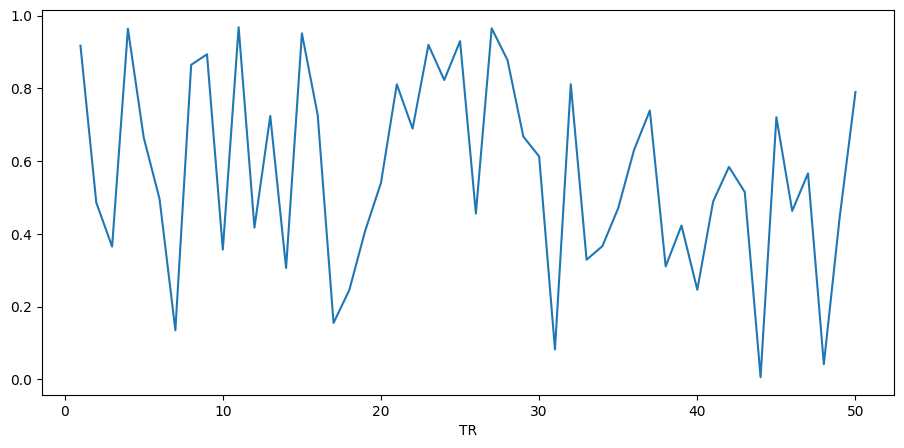

In [10]:
# Visualize Bold at node level
extractor.visualize_bold(subj_id="1",run=1, roi_indx=0)

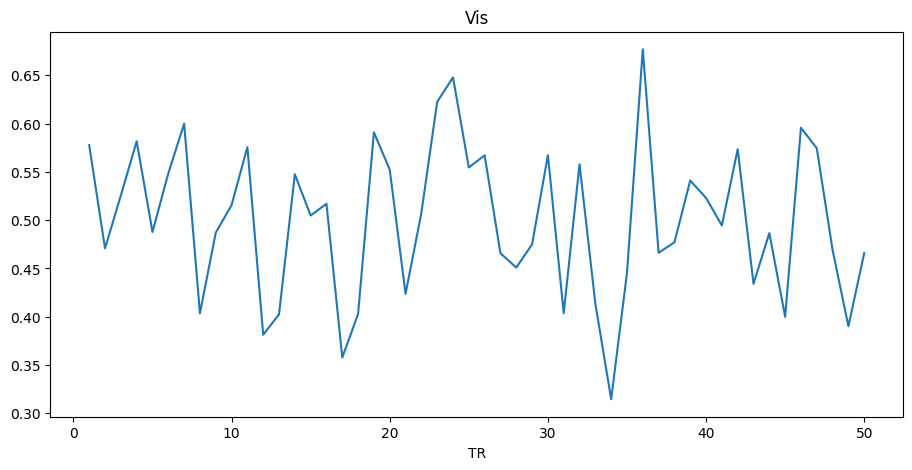

In [11]:
# Visualize Bold at network level
if ncol == 116:
    extractor.visualize_bold(subj_id="1",run=1, region="Cerebelum")
else:
    extractor.visualize_bold(subj_id="1",run=1, region="Vis")

In [12]:
# Performing Cap analysis with all subjects 
cap_analysis = CAP(n_clusters=3)
cap_analysis.get_caps(subject_timeseries=extractor.subject_timeseries)

In [13]:
cap_analysis.parcel_approach

In [14]:
subject_timeseries.keys()

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

Optimal cluster size for A is 9.



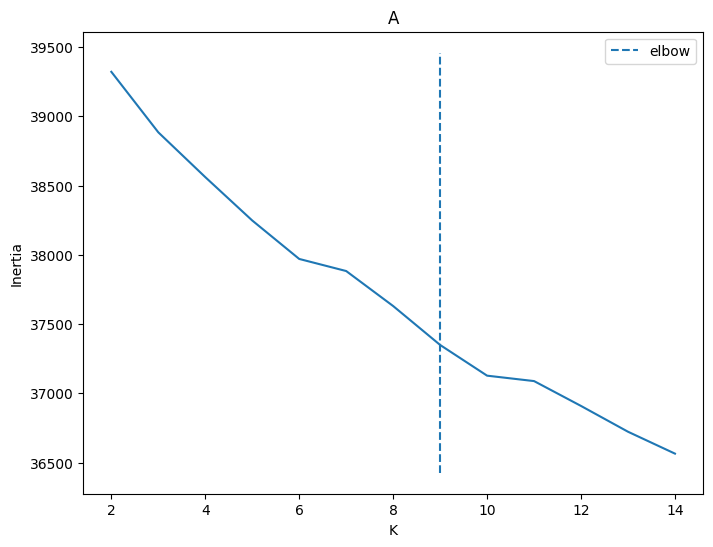

Optimal cluster size for B is 10.



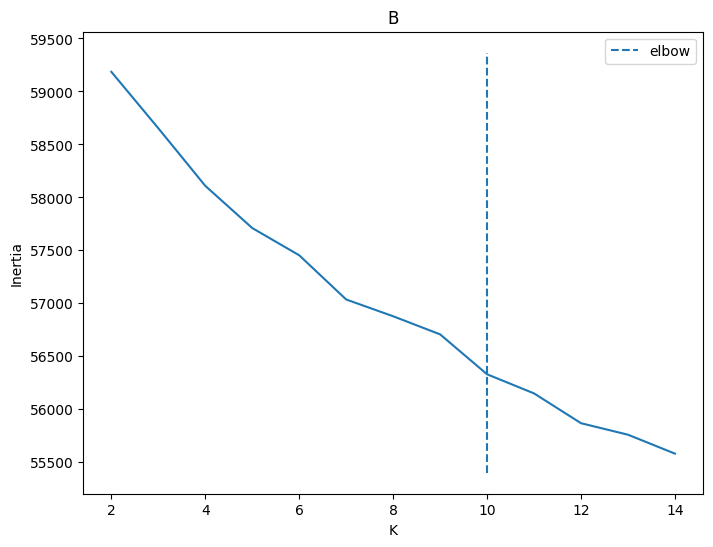

In [15]:
# Performing Cap analysis with groups, list of n_clusters, and elbow cluster selection method

cap_analysis = CAP(groups={"A": ["1","2","3","5"], "B": ["4","6","7","8","9","10"]}, n_clusters=list(range(2,15)),
                   cluster_selection_method="elbow")

# When elbow method is specified, the associated plots will be shown, furthermore, the saved kmeans model for each group will automatically save to the optimal cluster size

cap_analysis.get_caps(subject_timeseries="sample_for_neurocaps_demo_timeseries.pkl", runs=[1,2], show_figs=True)

In [16]:
# Performing Cap analysis with groups, list of n_clusters, and silhouette cluster selection method

cap_analysis = CAP(groups={"A": ["1","2","3","5"], "B": ["4","6","7","8","9","10"]}, n_clusters=list(range(2,4)),
                   cluster_selection_method="silhouette")

cap_analysis.get_caps(subject_timeseries="sample_for_neurocaps_demo_timeseries.pkl")

# kmeans model automatically save to the optimal size
cap_analysis.kmeans

Optimal cluster size for A is 2.
Optimal cluster size for B is 2.


{'A': KMeans(n_clusters=2), 'B': KMeans(n_clusters=2)}

In [17]:
cap_analysis.parcel_approach = parcel_approach

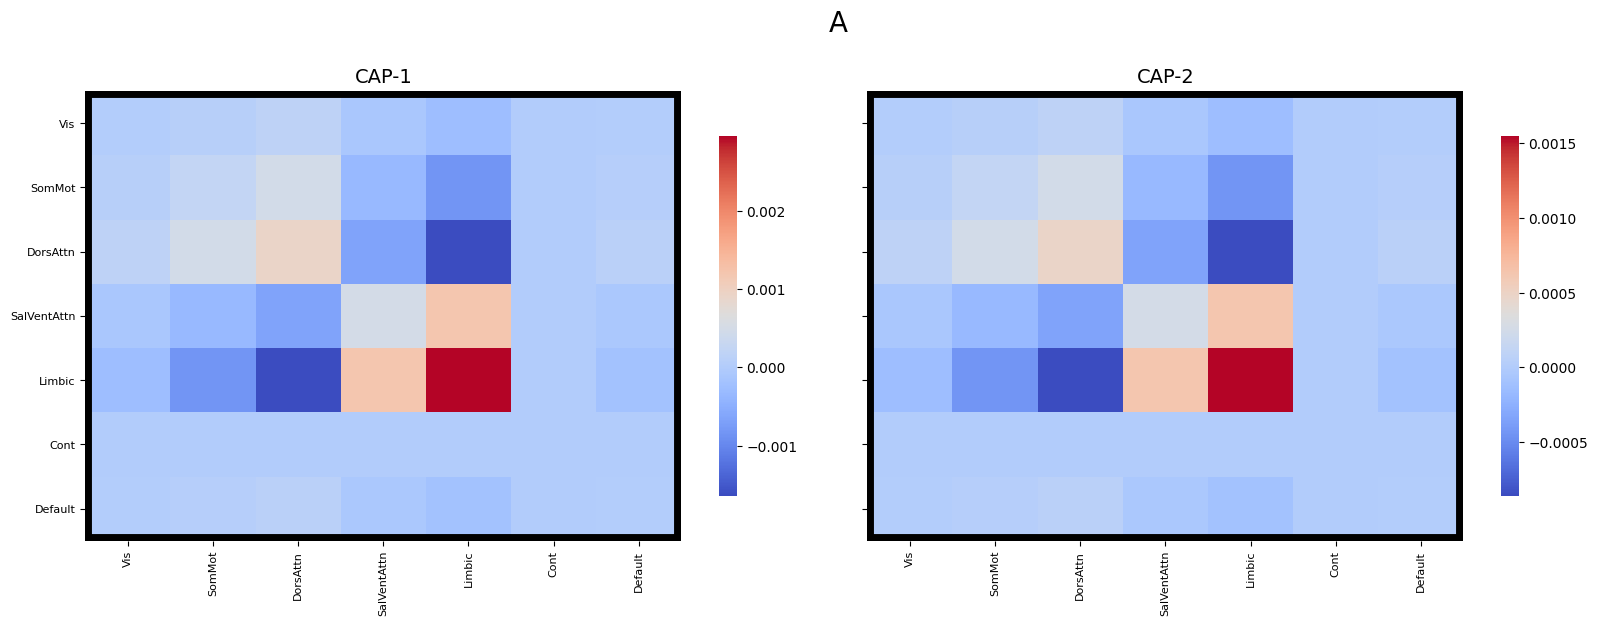

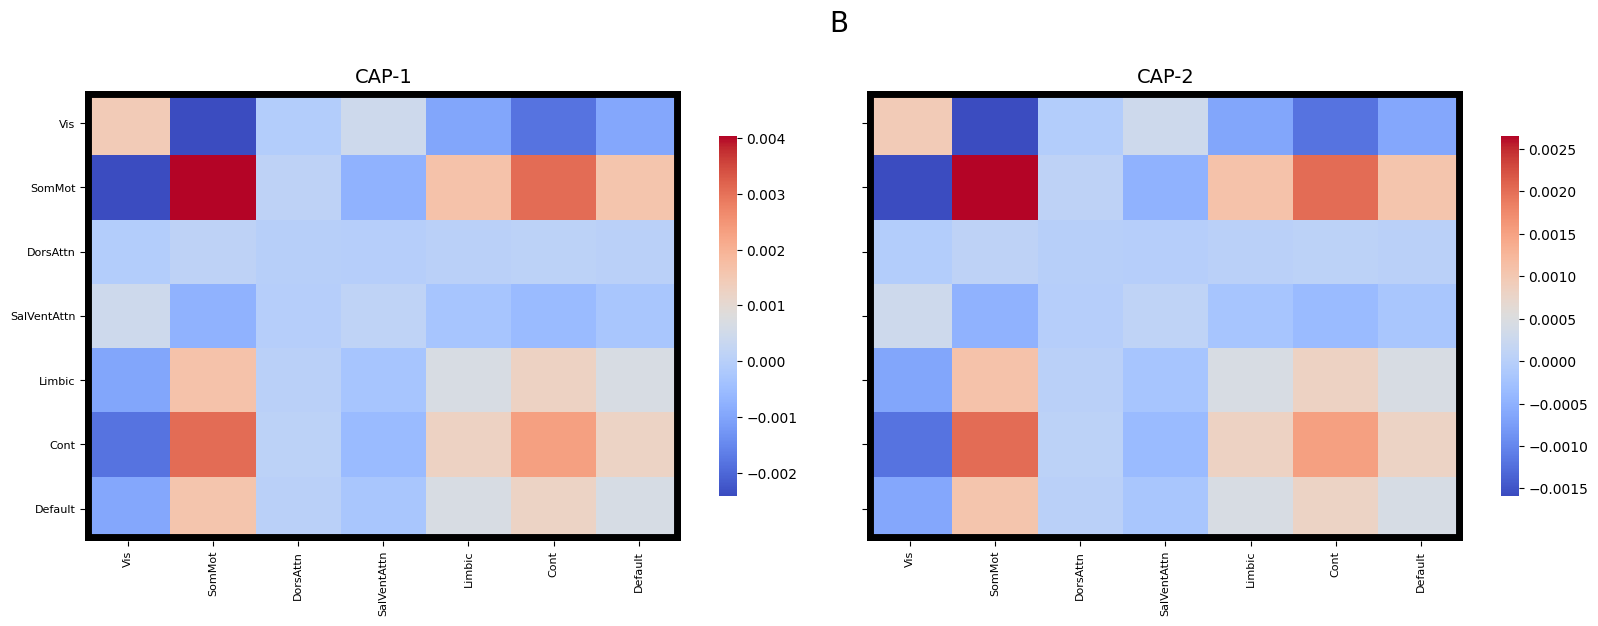

In [18]:
# Visualize Caps
cap_analysis.caps2plot(subplots=True, xlabel_rotation=90, sharey=True, borderwidths=10)

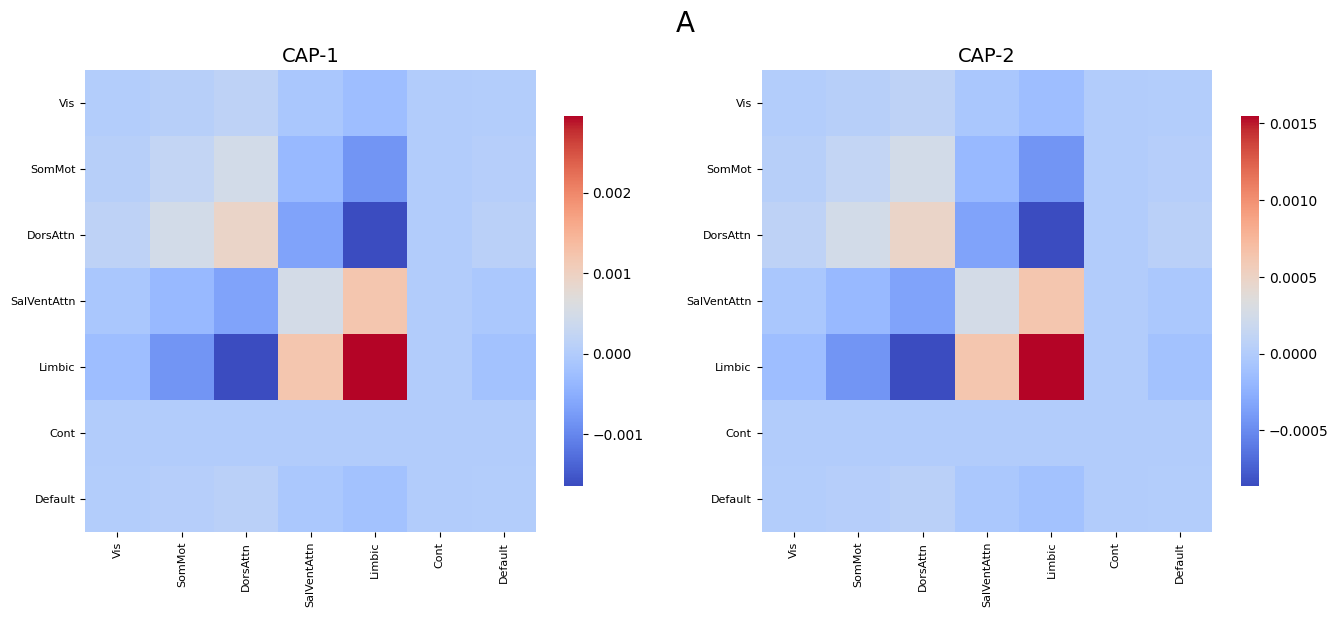

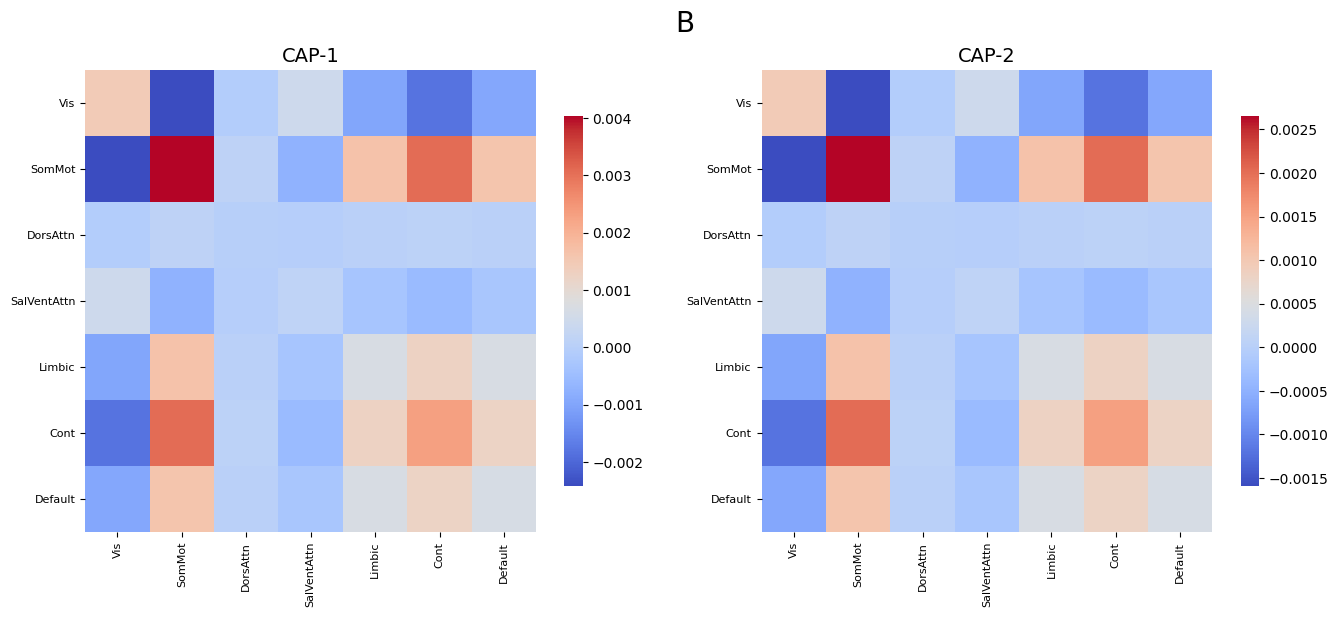

In [19]:
# Visualize Caps
cap_analysis.caps2plot(subplots=True, xlabel_rotation=90, hspace=0.6, tight_layout=False, sharey = False)

Invalid kwargs arguments used and will be ignored {'set_xlim': (-20, 120)}.


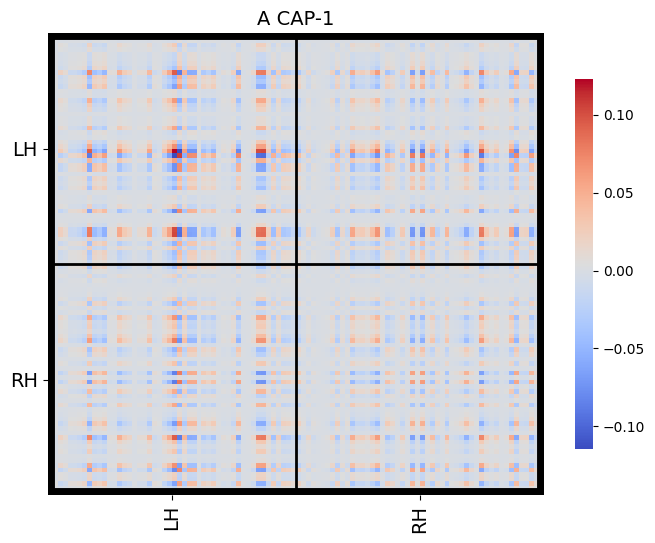

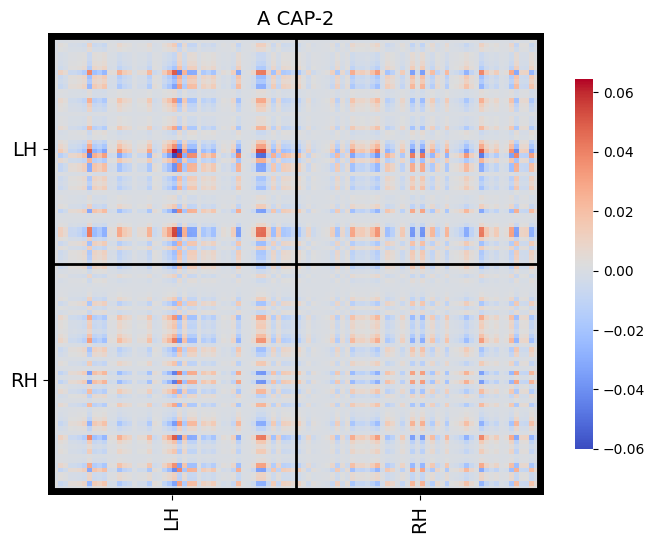

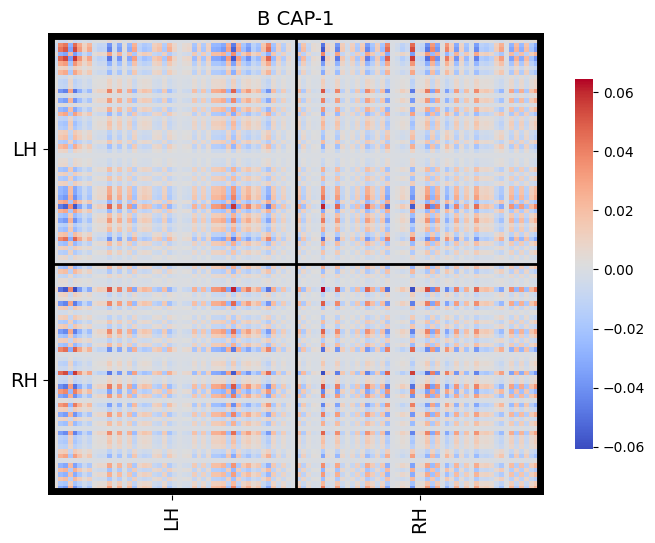

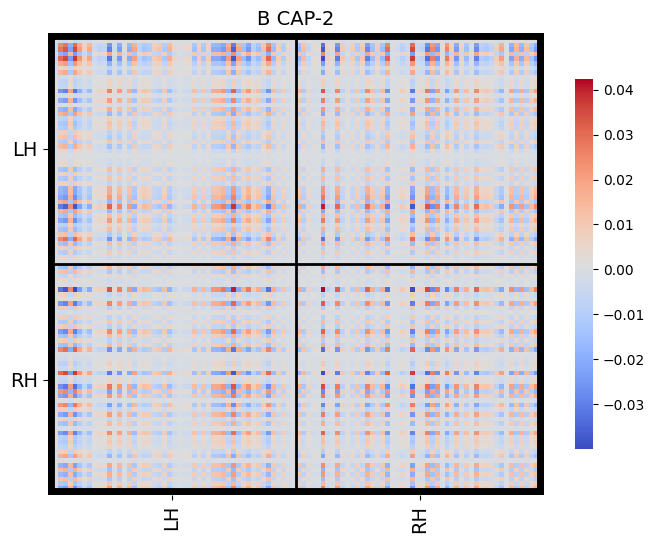

In [20]:
# Change scope from network to nodes
cap_analysis.caps2plot(subplots=False, yticklabels_size=14, wspace = 0.1, visual_scope="nodes", xlabel_rotation=90,
                       xticklabels_size = 14, hspace = 0.6, tight_layout = False, hemisphere_labels=True,
                       borderwidths=10, set_xlim = (-20, 120), linewidths=2)

In [21]:
cap_analysis._region_caps

{'A': {'CAP-1': array([-0.00507299, -0.0153824 , -0.03020865,  0.02210432,  0.05434409,
          0.00010808, -0.00364876]),
  'CAP-2': array([ 3.67354798e-03,  1.11389808e-02,  2.18752278e-02, -1.60065763e-02,
         -3.93526155e-02, -7.82672669e-05,  2.64220246e-03])},
 'B': {'CAP-1': array([-0.03800139,  0.06352658,  0.00188453, -0.01164596,  0.02611313,
          0.04814684,  0.02538359]),
  'CAP-2': array([ 0.030814  , -0.05151149, -0.0015281 ,  0.00944331, -0.02117423,
         -0.03904059, -0.02058267])}}

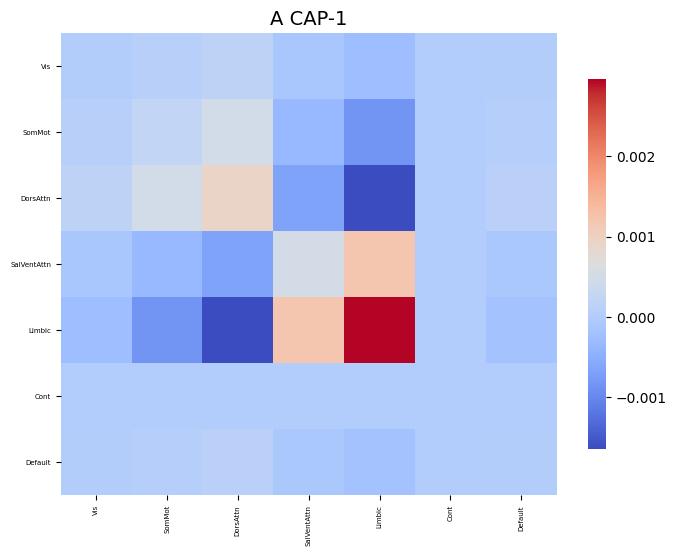

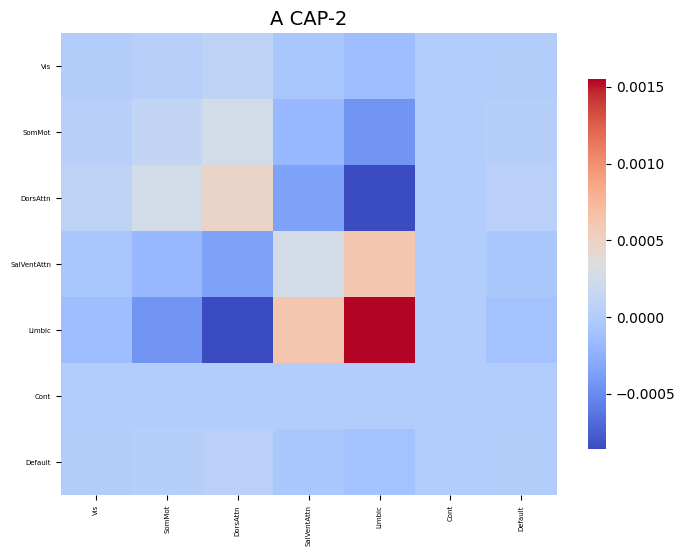

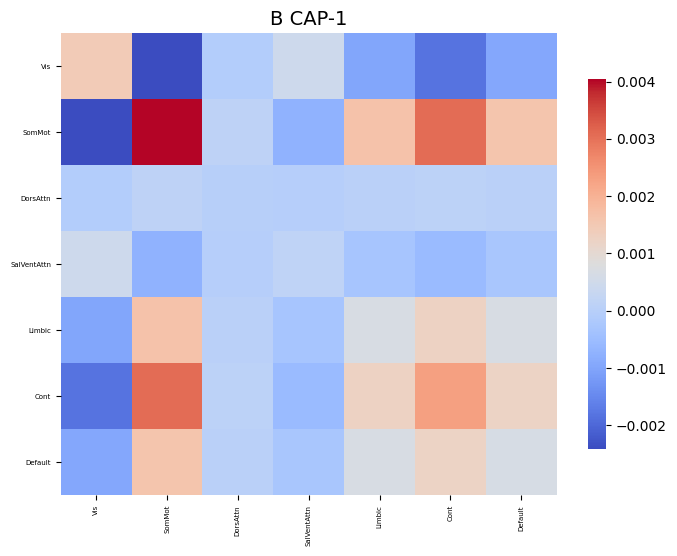

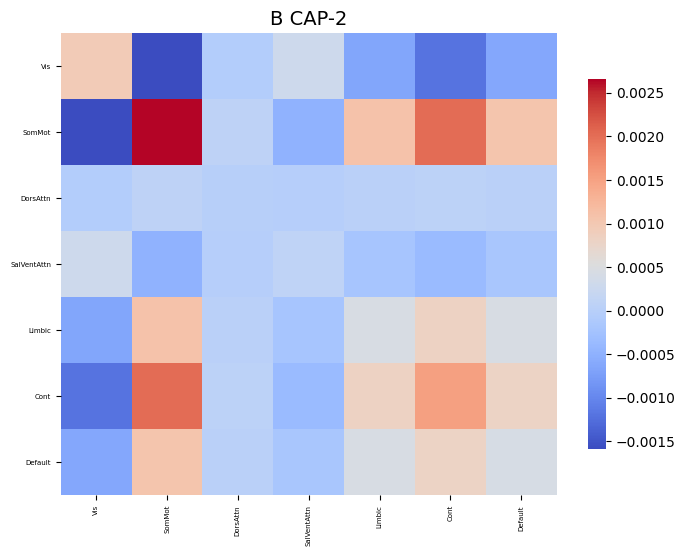

In [22]:
cap_analysis.caps2plot(subplots=False, yticklabels_size=5, wspace = 0.1, visual_scope="regions", xlabel_rotation=90,
                       xticklabels_size = 5, hspace = 0.6, tight_layout = False)

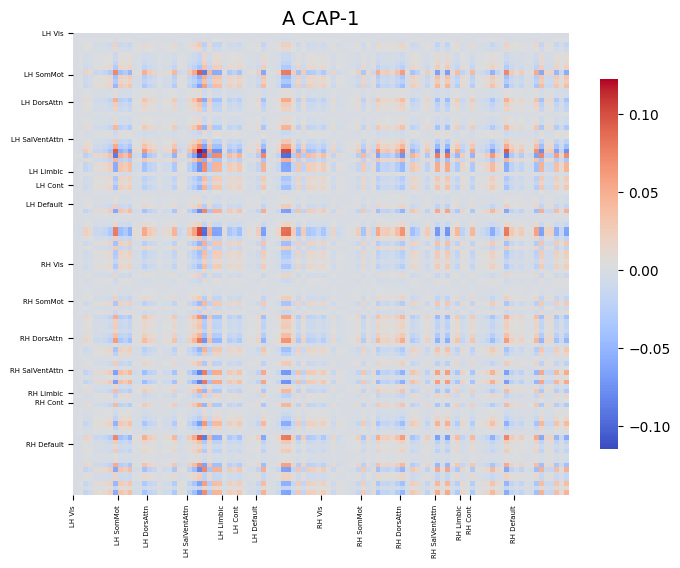

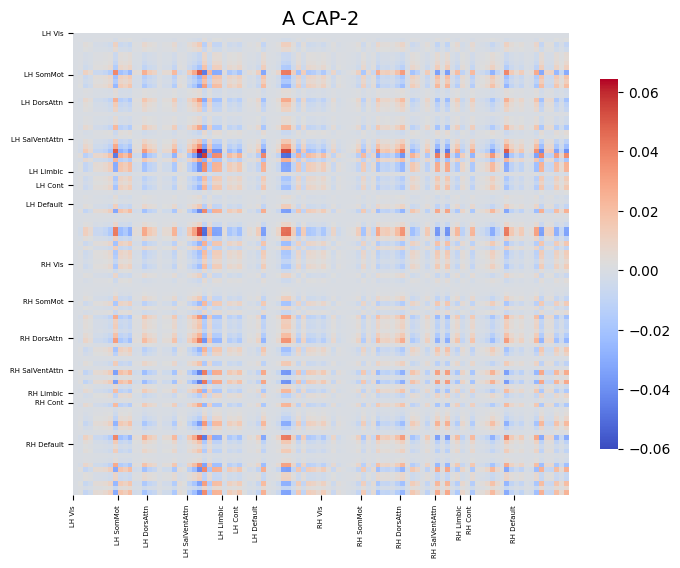

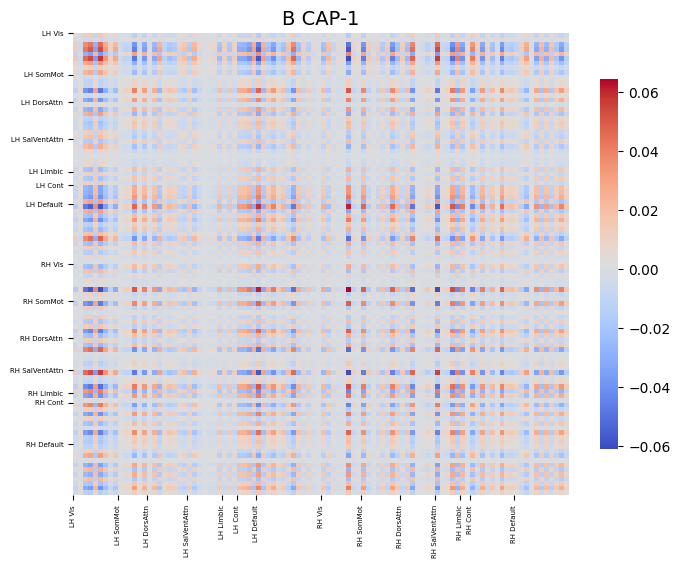

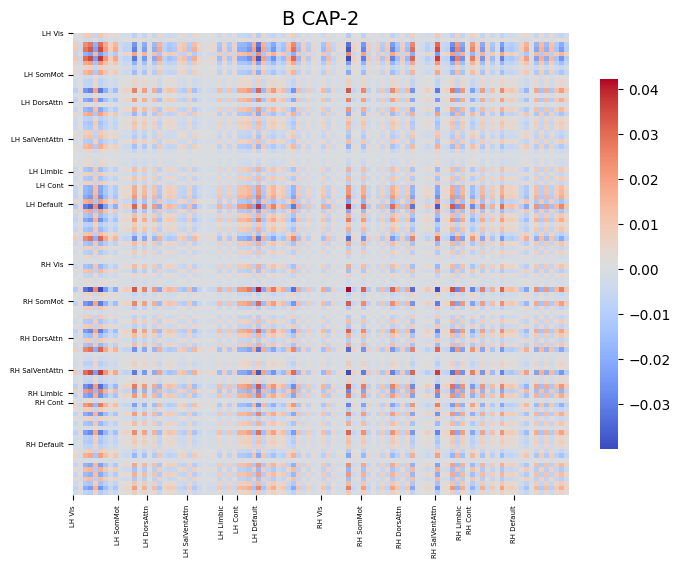

In [23]:
cap_analysis.caps2plot(subplots=False, yticklabels_size=5, wspace = 0.1, visual_scope="nodes", xlabel_rotation=90,
                       xticklabels_size = 5, hspace = 0.6, tight_layout = False)

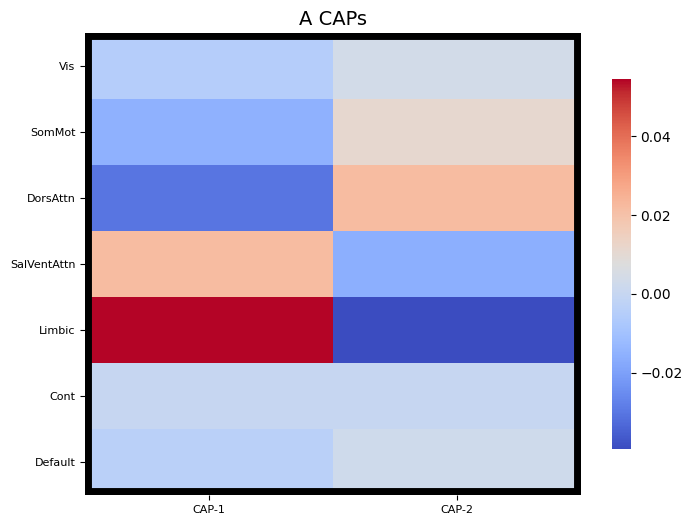

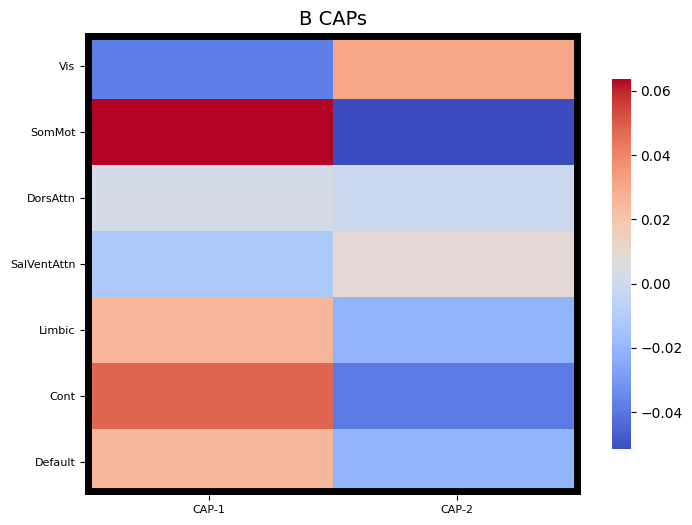

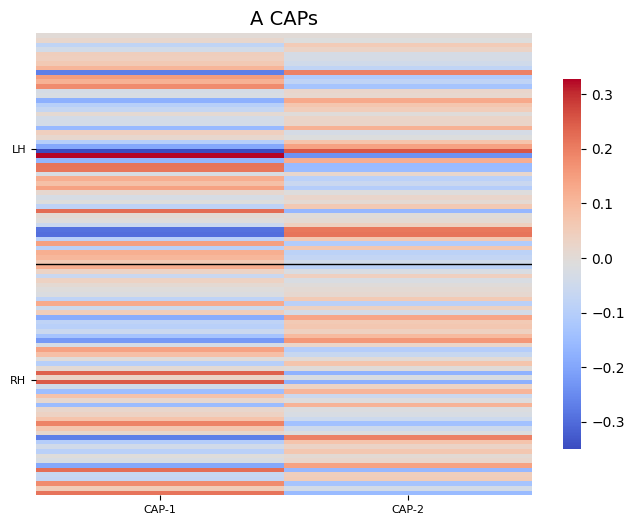

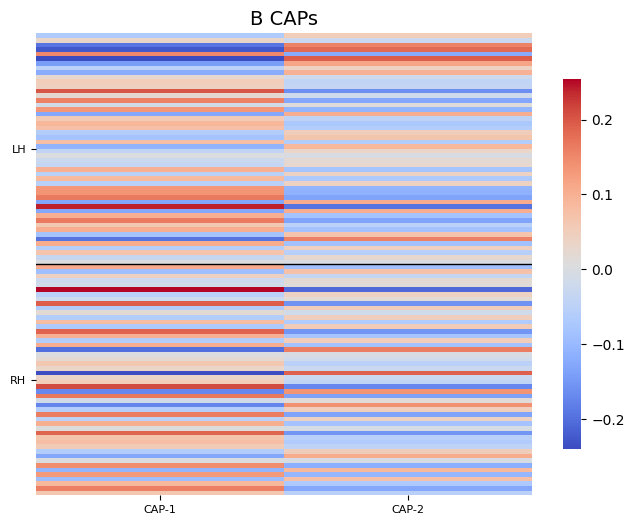

In [24]:
# Get regular heatmap 
cap_analysis.caps2plot(subplots=True, visual_scope="regions", plot_options="heatmap", borderwidths=10)
cap_analysis.caps2plot(subplots=True, visual_scope="nodes", plot_options="heatmap", hemisphere_labels = True)

In [25]:
cap_analysis.calculate_metrics(subject_timeseries=extractor.subject_timeseries,tr=2,metrics="persistence",
                               return_df=True)

{'persistence':    Subject_ID Group    Run     CAP-1     CAP-2
 0           1     A  run-1  3.636364  5.000000
 1           1     A  run-2  2.666667  5.230769
 2           1     A  run-3  2.888889  7.400000
 3           2     A  run-1  4.000000  5.454545
 4           2     A  run-2  3.400000  6.600000
 5           2     A  run-3  4.000000  4.666667
 6           3     A  run-1  3.200000  3.714286
 7           3     A  run-2  3.250000  3.200000
 8           3     A  run-3  3.230769  4.461538
 9           5     A  run-1  3.466667  3.200000
 10          5     A  run-2  4.000000  4.000000
 11          5     A  run-3  3.230769  4.833333
 12          4     B  run-1  3.166667  5.166667
 13          4     B  run-2  4.666667  3.666667
 14          4     B  run-3  3.538462  4.153846
 15          6     B  run-1  2.923077  4.428571
 16          6     B  run-2  2.533333  4.133333
 17          6     B  run-3  3.000000  3.466667
 18          7     B  run-1  3.000000  3.250000
 19          7     B  run

Invalid kwargs arguments used and will be ignored {'y': -3}.


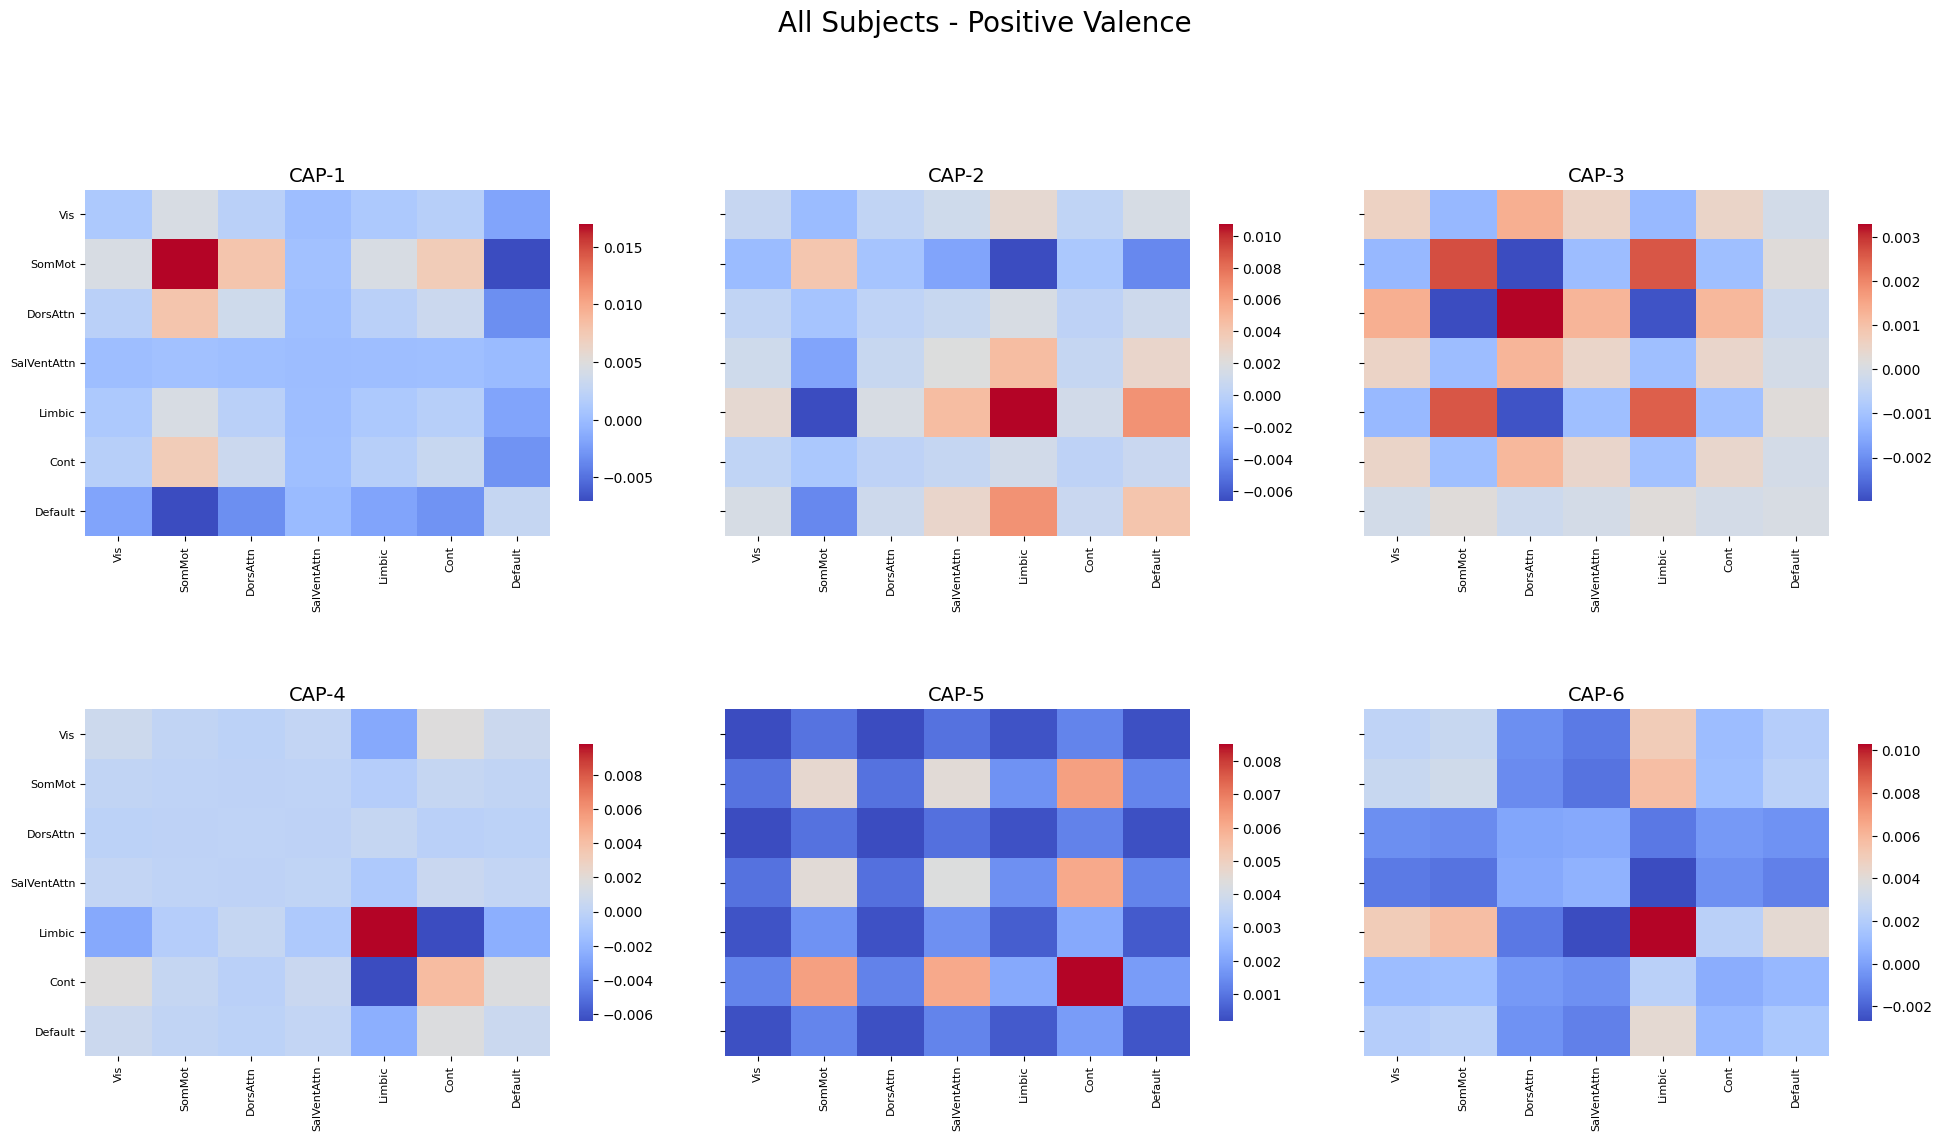

In [26]:
# Performing Cap analysis without groups or cluster selection method

cap_analysis = CAP(parcel_approach=extractor.parcel_approach, n_clusters=6)
cap_analysis.get_caps(subject_timeseries="sample_for_neurocaps_demo_timeseries.pkl")

# Invalid plotting keywords will be ignored and plotting will continue
cap_analysis.caps2plot(subplots=True, wspace = 0.1, hspace = 0.5, ncol=3, suffix_title="- Positive Valence", y = -3,
                       xlabel_rotation=90, tight_layout=False, yticklabels_size=8, xticklabels_size=8)

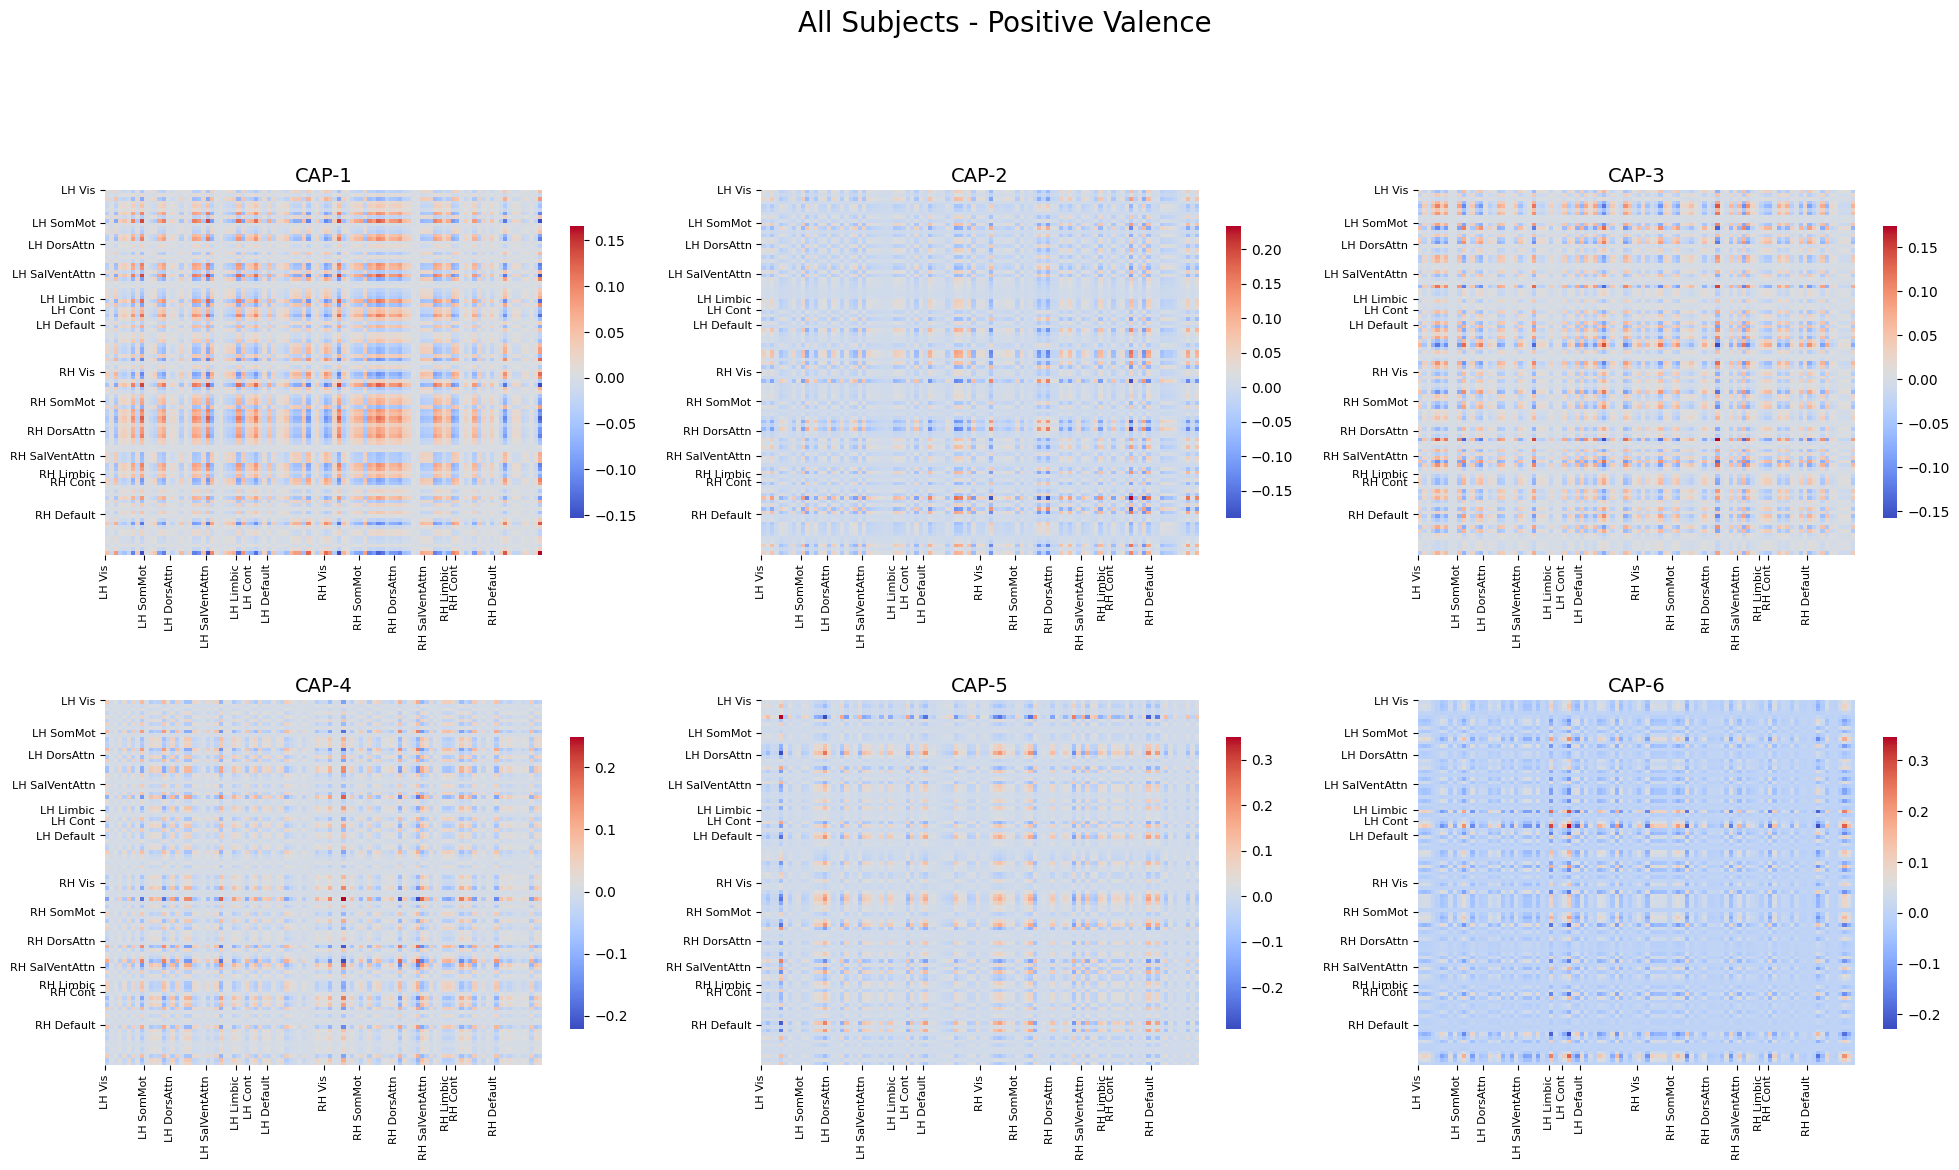

In [27]:
cap_analysis.caps2plot(visual_scope="nodes", plot_options="outer product", suffix_title="- Positive Valence", ncol=3, sharey=False, subplots=True, xlabel_rotation = 90, tight_layout=False, hspace = 0.4)

In [28]:
# Individual plots. In the event you wnat to merge TRs from two dictionaries conatining the same subject to find common CAPs across a task
subject_timeseries_1 = {str(x) : {f"run-{y}": np.random.rand(100,ncol) for y in range(1,4)} for x in range(1,11)}
subject_timeseries_2 = {str(x) : {f"run-{y}": np.random.rand(100,ncol) for y in range(1,4)} for x in range(1,7)}
# Includes `output_dir` and `file_name` parameters to save merge dictionary as a pickle file

# Returns combined dictionary as well as the reduced subject dictionaries containing only the subjects present in the combined
all_dicts = merge_dicts(subject_timeseries_list=[subject_timeseries_1, subject_timeseries_2],
                        return_combined_dict=True, return_reduced_dicts=True)
# Only the combined subject dictionary
subject_timeseries_combined = merge_dicts(subject_timeseries_list=[subject_timeseries_1, subject_timeseries_2],
                                          return_combined_dict=True, return_reduced_dicts=False)

print(all_dicts["dict_0"].keys())
print(all_dicts["dict_1"].keys())
print(all_dicts["combined"].keys())

dict_keys(['1', '2', '3', '4', '5', '6'])
dict_keys(['1', '2', '3', '4', '5', '6'])
dict_keys(['1', '2', '3', '4', '5', '6'])


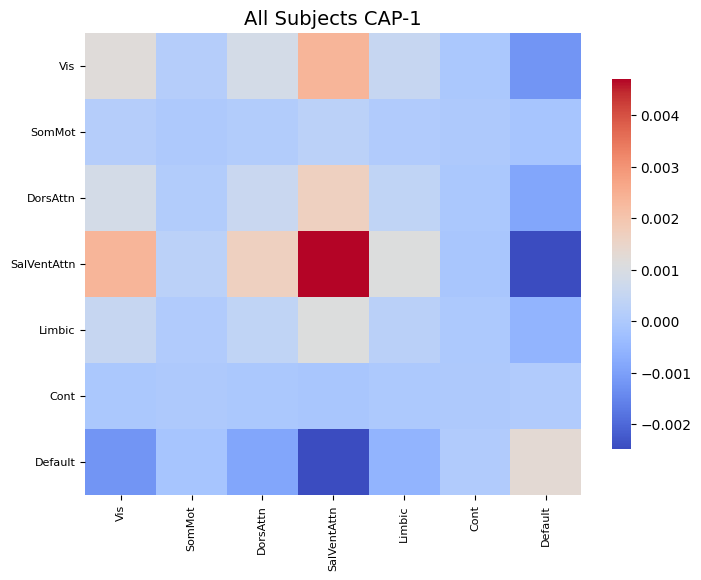

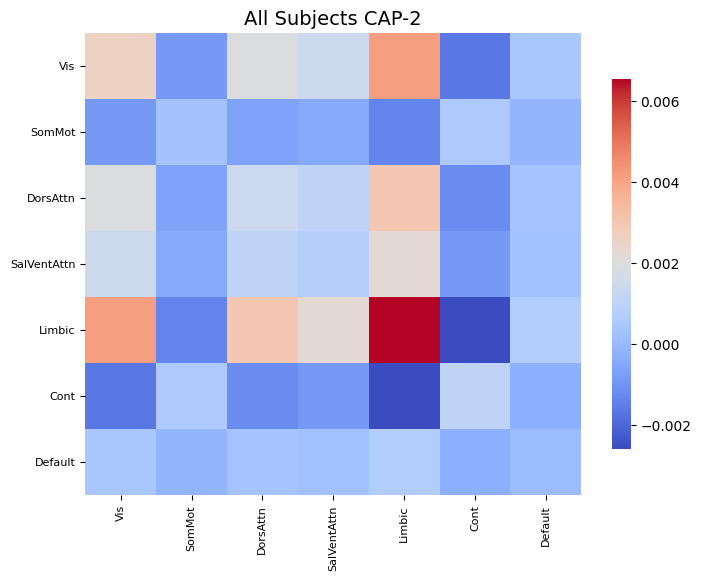

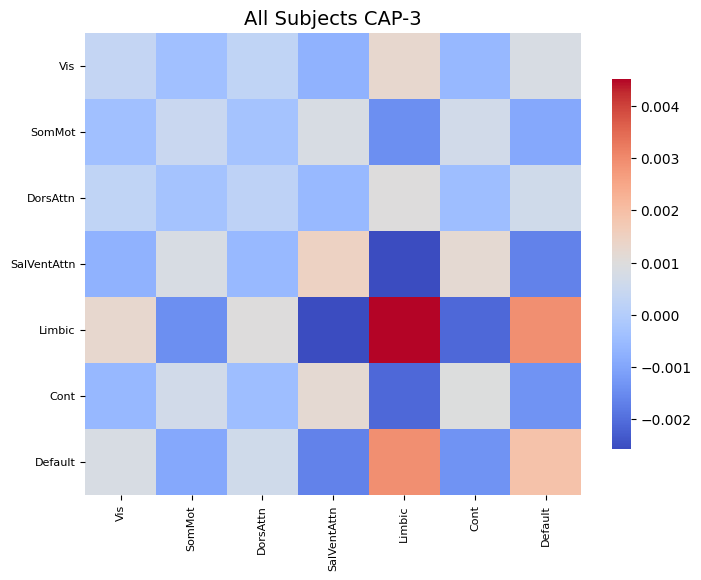

In [29]:
cap_analysis = CAP(parcel_approach=extractor.parcel_approach, n_clusters=3)
cap_analysis.get_caps(subject_timeseries=subject_timeseries_combined)
cap_analysis.caps2plot(xlabel_rotation=90)

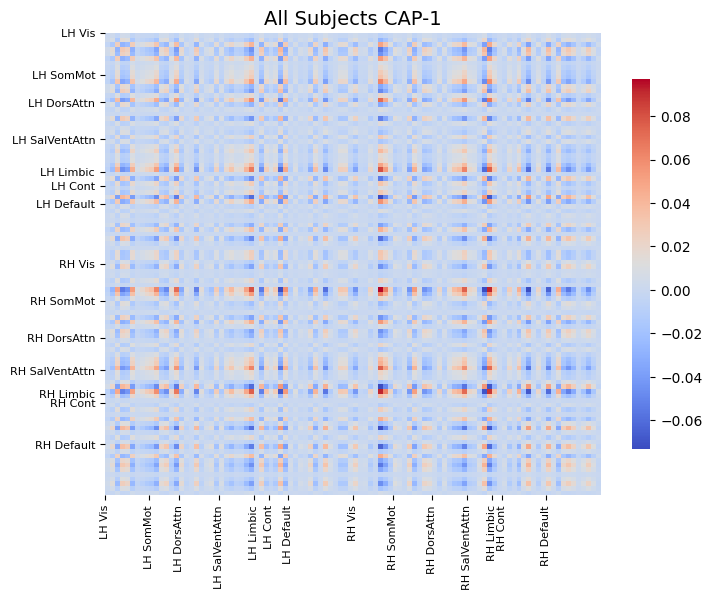

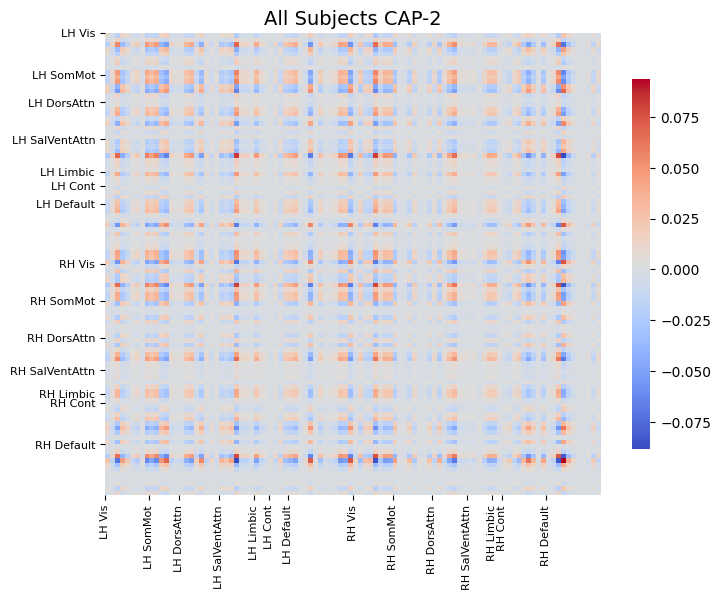

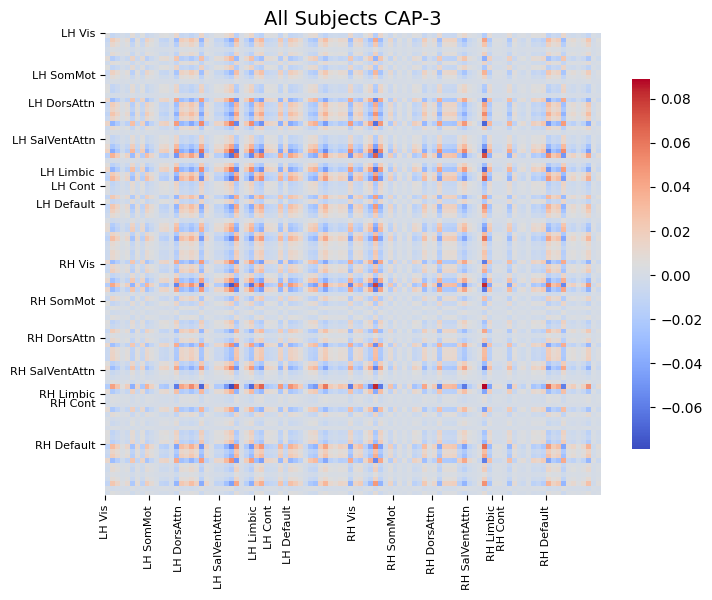

In [30]:
cap_analysis.caps2plot(visual_scope="nodes", plot_options="outer product", xlabel_rotation = 90)

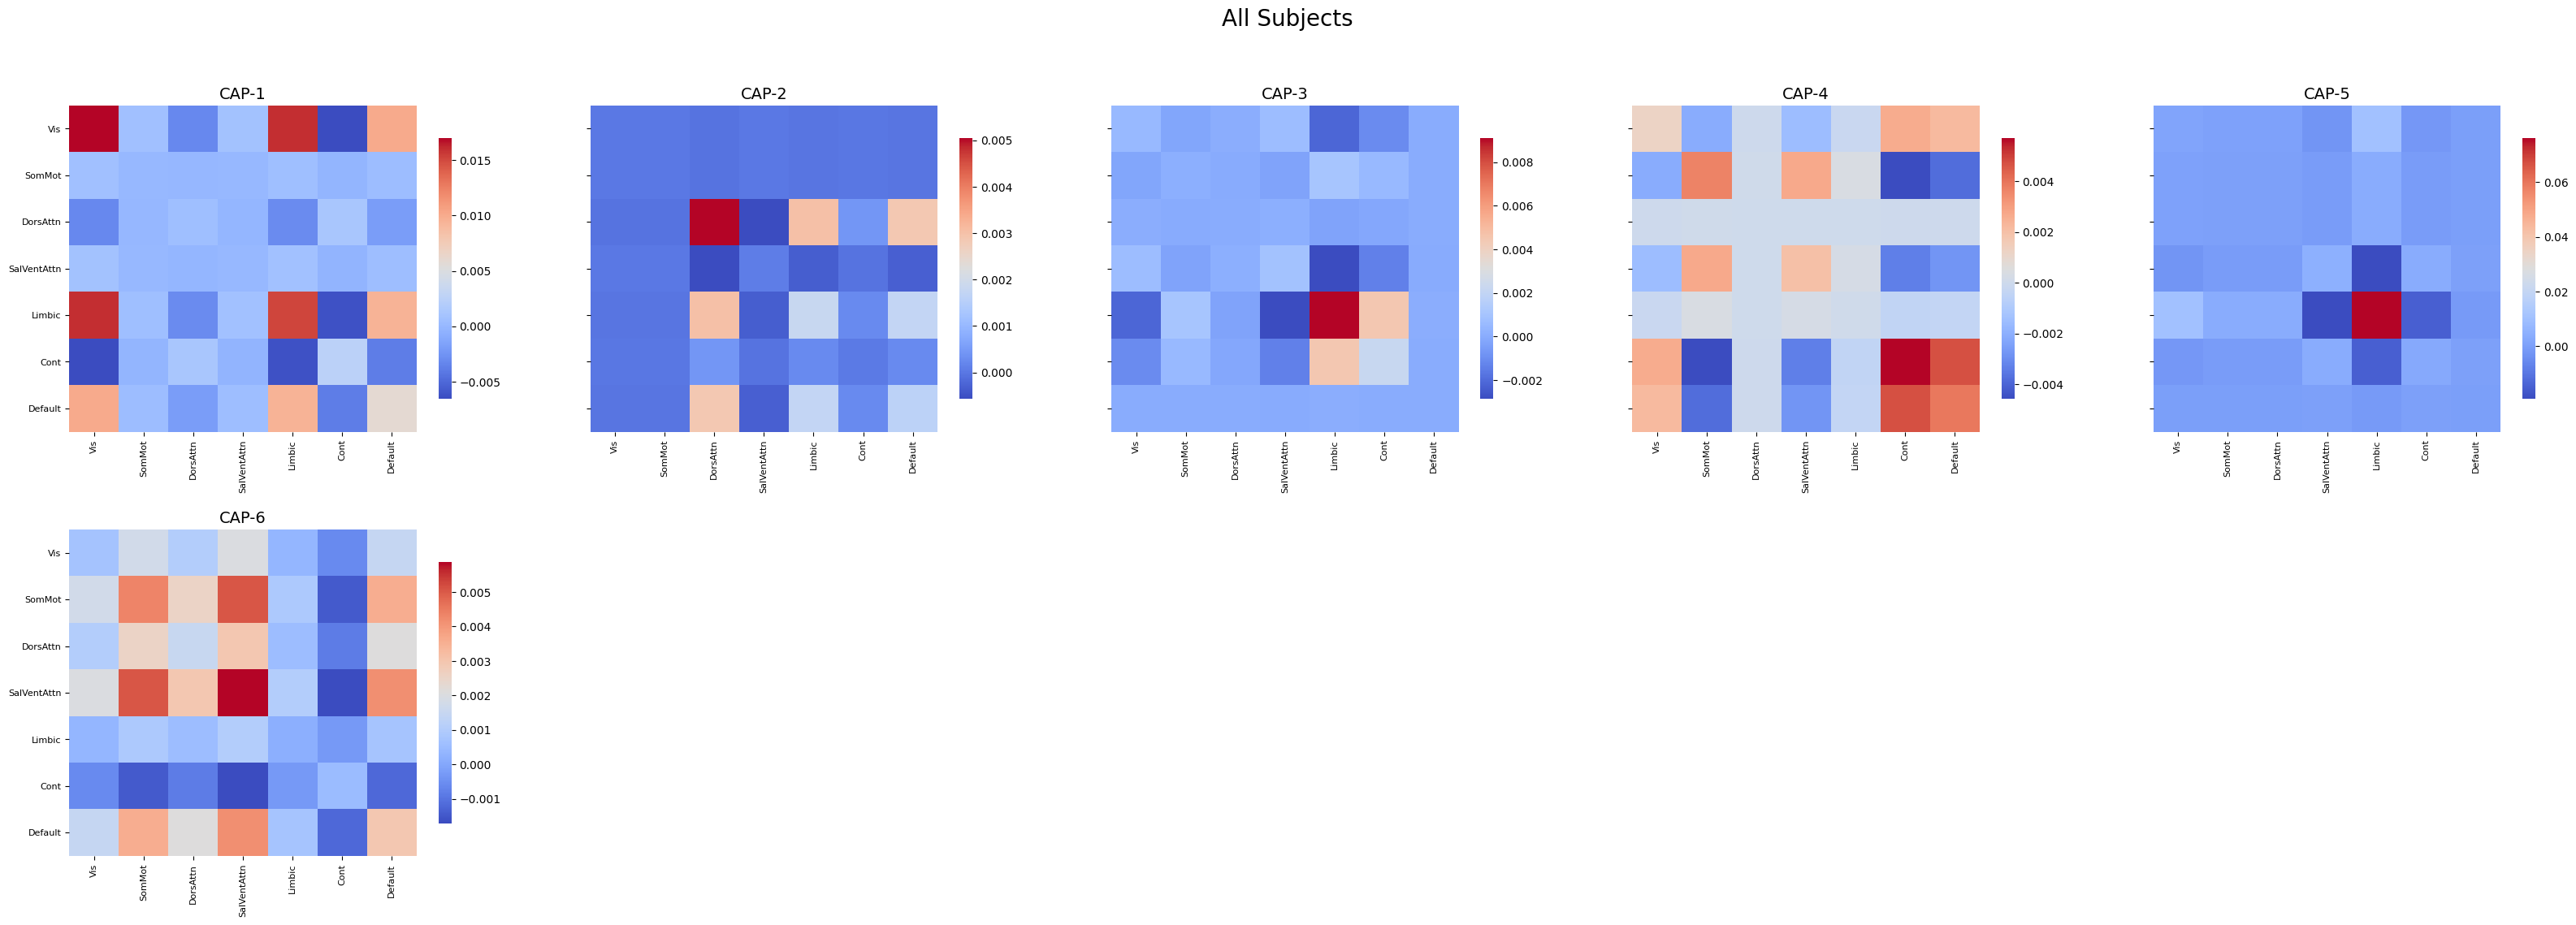

In [31]:
# Performing Caps analysis with no groups and no cluster selection method
cap_analysis = CAP(parcel_approach=extractor.parcel_approach, n_clusters=6)
cap_analysis.get_caps(subject_timeseries=extractor.subject_timeseries)
cap_analysis.caps2plot(visual_scope="regions", plot_options="outer product", subplots=True, fontsize=14,
                       xlabel_rotation=90, tight_layout=False, hspace=0.3)

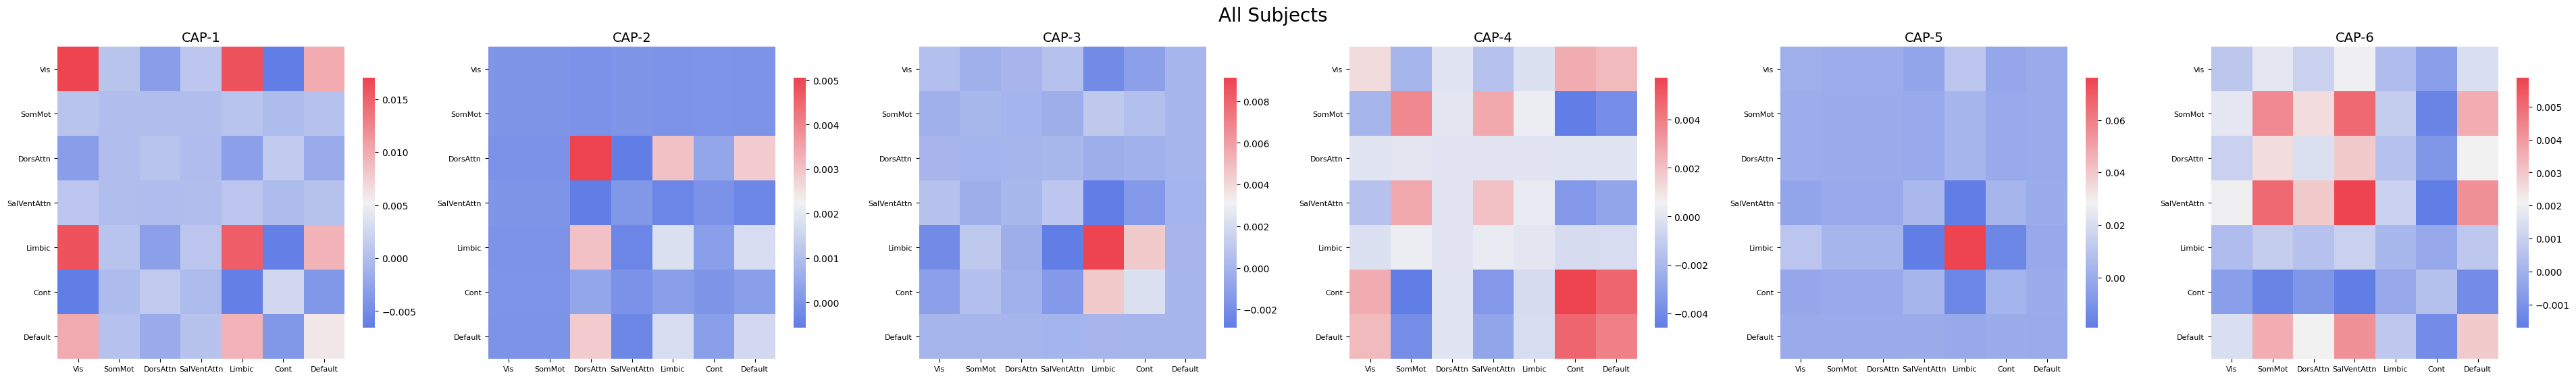

In [32]:
import seaborn as sns
sns.diverging_palette(145, 300, s=60, as_cmap=True)
palette = sns.diverging_palette(260, 10, s=80, l=55, n=256, as_cmap=True)
cap_analysis.caps2plot(visual_scope="regions", plot_options="outer product", subplots=True, fontsize=14, ncol=6,
                       sharey=False, tight_layout=False, xlabel_rotation=0, hspace = 0.3, cmap=palette)

In [33]:
help(cap_analysis.caps2plot)

Help on method caps2plot in module neurocaps.analysis.cap:

caps2plot(output_dir: Union[str, os.PathLike, NoneType] = None, suffix_title: Optional[str] = None, plot_options: Union[str, List[str]] = 'outer product', visual_scope: List[str] = 'regions', show_figs: bool = True, subplots: bool = False, **kwargs) -> <function heatmap at 0x000001EF7C026560> method of neurocaps.analysis.cap.CAP instance
    **Generate heatmaps and outer product plots of CAPs**
    
    This function produces ``seaborn`` heatmaps for each CAP. If groups were given when the CAP class was
    initialized, plotting will be done for all CAPs for all groups.
    
    Parameters
    ----------
    output_dir : `os.PathLike` or None, default=None
        Directory to save plots to. The directory will be created if it does not exist. If ``None``, plots will not
        be saved.
    suffix_title : str or None, default=None
        Appended to the title of each plot as well as the name of the saved file if ``output_dir

In [34]:
output = cap_analysis.calculate_metrics(subject_timeseries=extractor.subject_timeseries,return_df=True, runs=[1,2])
output["temporal fraction"]

,Subject_ID,Group,Run,CAP-1,CAP-2,CAP-3,CAP-4,CAP-5,CAP-6
0,1,All Subjects,run-1,0.20,0.18,0.10,0.24,0.08,0.20
1,1,All Subjects,run-2,0.20,0.16,0.20,0.20,0.14,0.10
2,2,All Subjects,run-1,0.08,0.16,0.22,0.20,0.18,0.16
3,2,All Subjects,run-2,0.16,0.10,0.26,0.16,0.10,0.22
4,3,All Subjects,run-1,0.10,0.20,0.18,0.16,0.14,0.22
5,3,All Subjects,run-2,0.20,0.24,0.18,0.14,0.16,0.08
6,4,All Subjects,run-1,0.22,0.16,0.14,0.26,0.14,0.08
7,4,All Subjects,run-2,0.18,0.22,0.12,0.12,0.16,0.20
8,5,All Subjects,run-1,0.14,0.12,0.14,0.30,0.10,0.20
9,5,All Subjects,run-2,0.22,0.06,0.14,0.20,0.22,0.16


In [35]:
cap_analysis.calculate_metrics(subject_timeseries=extractor.subject_timeseries,return_df=True, runs=[1,2],
                               continuous_runs=True)

{'temporal fraction':   Subject_ID         Group              Run     CAP-1     CAP-2     CAP-3  \
 0          1  All Subjects  Continuous Runs  0.160000  0.186667  0.146667   
 1          2  All Subjects  Continuous Runs  0.113333  0.126667  0.220000   
 2          3  All Subjects  Continuous Runs  0.160000  0.213333  0.180000   
 3          4  All Subjects  Continuous Runs  0.213333  0.180000  0.133333   
 4          5  All Subjects  Continuous Runs  0.173333  0.120000  0.126667   
 5          6  All Subjects  Continuous Runs  0.180000  0.166667  0.226667   
 6          7  All Subjects  Continuous Runs  0.140000  0.173333  0.180000   
 7          8  All Subjects  Continuous Runs  0.180000  0.206667  0.173333   
 8          9  All Subjects  Continuous Runs  0.133333  0.180000  0.186667   
 9         10  All Subjects  Continuous Runs  0.100000  0.246667  0.140000   
 
       CAP-4     CAP-5     CAP-6  
 0  0.220000  0.126667  0.160000  
 1  0.186667  0.146667  0.206667  
 2  0.146667  

In [36]:
help(cap_analysis.calculate_metrics)

Help on method calculate_metrics in module neurocaps.analysis.cap:

calculate_metrics(subject_timeseries: Union[Dict[str, Dict[str, numpy.ndarray]], str], tr: Optional[float] = None, runs: Optional[int] = None, continuous_runs: bool = False, metrics: Union[str, List[str]] = ['temporal fraction', 'persistence', 'counts', 'transition frequency'], return_df: bool = True, output_dir: Union[str, os.PathLike, NoneType] = None, prefix_file_name: Optional[str] = None) -> Dict[str, pandas.core.frame.DataFrame] method of neurocaps.analysis.cap.CAP instance
    **Get CAPs metrics**
    
    Creates a single ``pandas`` ``DataFrame`` containing CAP metrics for all participants, as described
    Liu et al., 2018 and Yang et al., 2021. The metrics include:
    
     - ``"temporal fraction"``: The proportion of total volumes spent in a single CAP over all volumes in a run.
       ::
    
            predicted_subject_timeseries = [1, 2, 1, 1, 1, 3]
            target = 1
            temporal_fraction 

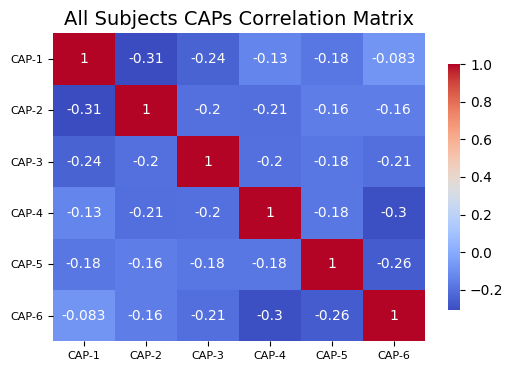

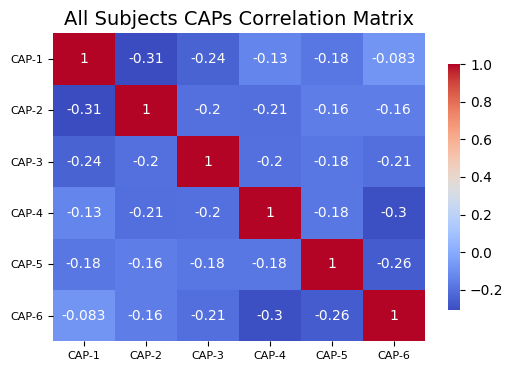

In [37]:
cap_analysis.caps2corr(annot=True ,figsize=(6,4))

import seaborn as sns
palette = sns.diverging_palette(260, 10, s=80, l=55, n=256, as_cmap=True)
cap_analysis.caps2corr(annot=True ,figsize=(6,4))

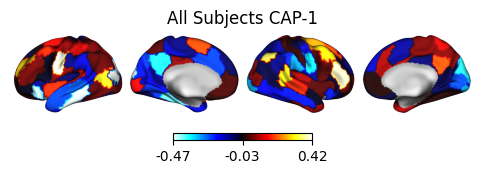

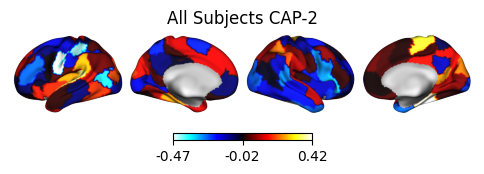

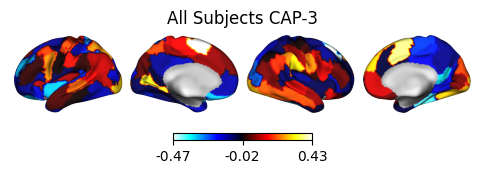

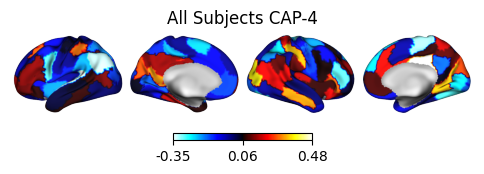

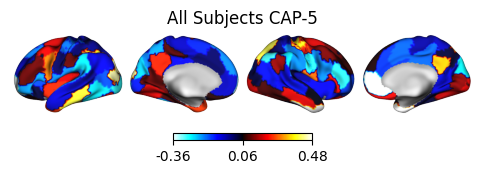

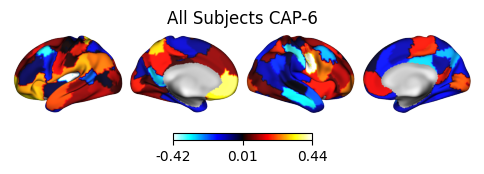

In [38]:
# If you experience coverage issues, usually smoothing helps to mitigate these issues

#cap_analysis.caps2surf(fwhm=1, output_dir=output_dir,save_stat_map=True)

cap_analysis.caps2surf(cmap="cold_hot", layout="row",  size=(500, 100))

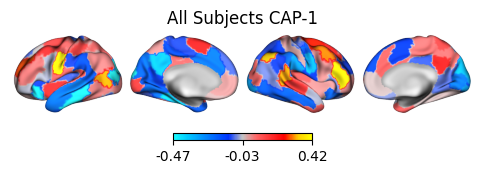

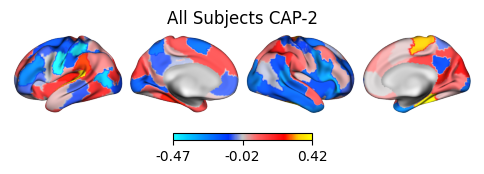

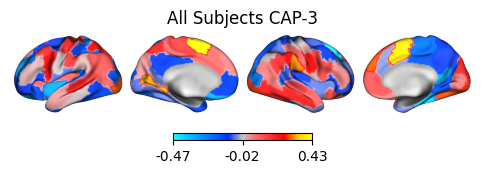

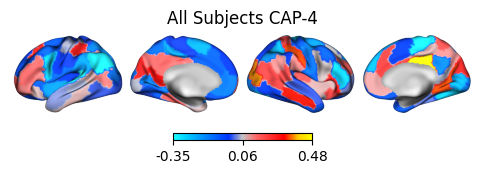

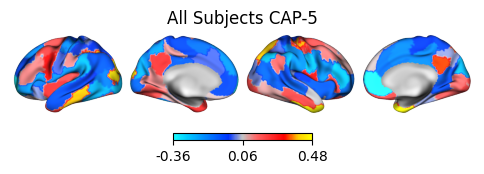

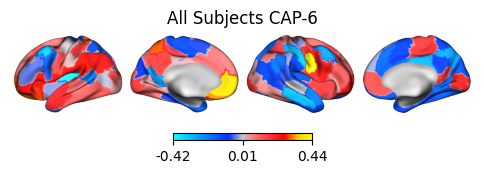

In [39]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#1bfffe", "#00ccff", "#0099ff", "#0066ff", "#0033ff", "#c4c4c4", "#ff6666", 
          "#ff3333", "#FF0000","#ffcc00","#FFFF00"]

# Create the colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cold_hot", colors, N=256)
cap_analysis.caps2surf(cmap=custom_cmap, size=(500, 100), layout="row")

In [40]:
radialaxis={"showline": True, "linewidth": 2, "linecolor": "rgba(0, 0, 0, 0.25)", "gridcolor": "rgba(0, 0, 0, 0.25)",
            "ticks": "outside" , "tickfont": {"size": 14, "color": "black"}, "range": [0,0.3],
            "tickvals": [0.1,0.2,0.3]}
cap_analysis.caps2radar(radialaxis=radialaxis, fill="toself", scattersize=10)

In [41]:
os.remove("sample_for_neurocaps_demo_timeseries.pkl")